In [ ]:
import numpy as np
import pandas as pd
from collections import Counter
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [ ]:
df = pd.read_csv('../input/Daegu_Real_Estate_data.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5891 entries, 0 to 5890
Data columns (total 30 columns):
SalePrice                             5891 non-null int64
YearBuilt                             5891 non-null int64
YrSold                                5891 non-null int64
MonthSold                             5891 non-null int64
Size(sqf)                             5891 non-null int64
Floor                                 5891 non-null int64
HallwayType                           5891 non-null object
HeatingType                           5891 non-null object
AptManageType                         5891 non-null object
N_Parkinglot(Ground)                  5891 non-null float64
N_Parkinglot(Basement)                5891 non-null float64
TimeToBusStop                         5891 non-null object
TimeToSubway                          5891 non-null object
N_APT                                 5891 non-null float64
N_manager                             5891 non-null float64
N_elevator

In [ ]:
df.isnull().sum()

SalePrice                             0
YearBuilt                             0
YrSold                                0
MonthSold                             0
Size(sqf)                             0
Floor                                 0
HallwayType                           0
HeatingType                           0
AptManageType                         0
N_Parkinglot(Ground)                  0
N_Parkinglot(Basement)                0
TimeToBusStop                         0
TimeToSubway                          0
N_APT                                 0
N_manager                             0
N_elevators                           0
SubwayStation                         0
N_FacilitiesNearBy(PublicOffice)      0
N_FacilitiesNearBy(Hospital)          0
N_FacilitiesNearBy(Dpartmentstore)    0
N_FacilitiesNearBy(Mall)              0
N_FacilitiesNearBy(ETC)               0
N_FacilitiesNearBy(Park)              0
N_SchoolNearBy(Elementary)            0
N_SchoolNearBy(Middle)                0


# Preprocessing

### Linear regression

very first idea coming from my head is real estate price linearly related to many features.

To fit and predict price, we need numeric data. 

We will use TimeToSubway and TimeToBusStop features because as we've seen through EDA process, those features affect on price.


In [ ]:
Counter(df['TimeToSubway'])

Counter({'0-5min': 2759,
         '10min~15min': 806,
         '15min~20min': 953,
         '5min~10min': 1135,
         'no_bus_stop_nearby': 238})

In [ ]:
Counter(df['TimeToBusStop'])

Counter({'0~5min': 4509, '10min~15min': 55, '5min~10min': 1327})

 change categorical value to numeric value. 
 
 use your common sense, the shorter time get to subway station or bus stop, the more expensive.
 
 let's map new values and apply on data.

In [ ]:
subway_mapping = {'0-5min': 4, '5min~10min': 3, '10min~15min': 2, '15min~20min': 1, 'no_bus_stop_nearby': 0}
bus_mapping = {'0~5min': 2, '5min~10min': 1, '10min~15min': 0}

In [ ]:
df['TimeToSubway'] = df['TimeToSubway'].map(subway_mapping)
df['TimeToBusStop'] = df['TimeToBusStop'].map(bus_mapping)

Done!

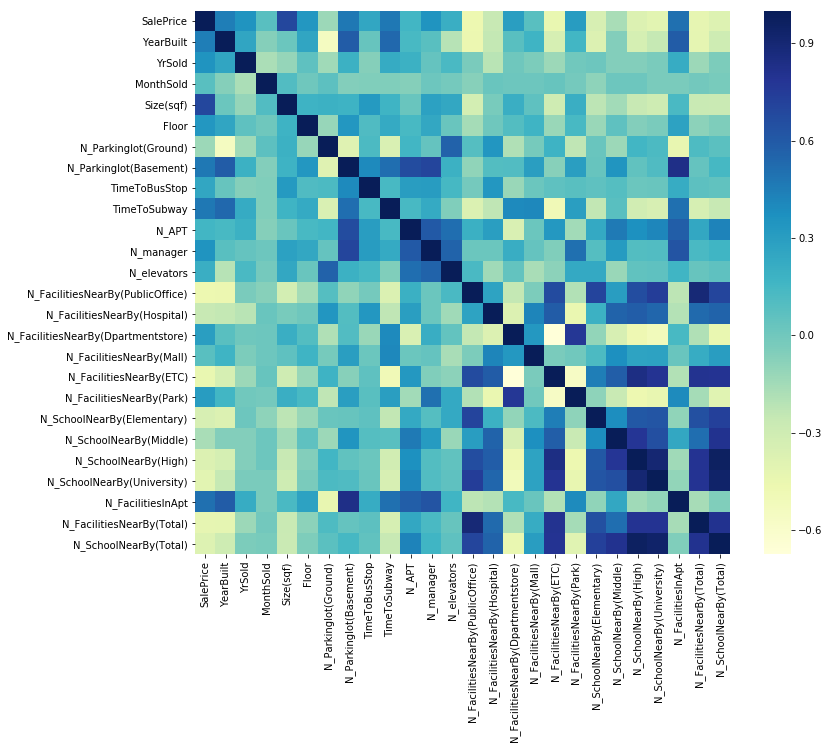

In [ ]:
fig, ax = plt.subplots(figsize=(12,10))
corr = df.corr()
sns.heatmap(corr, cmap="YlGnBu")

In [ ]:
corr.iloc[0]

SalePrice                             1.000000
YearBuilt                             0.447875
YrSold                                0.357682
MonthSold                             0.081924
Size(sqf)                             0.697199
Floor                                 0.336729
N_Parkinglot(Ground)                 -0.130549
N_Parkinglot(Basement)                0.473252
TimeToBusStop                         0.252062
TimeToSubway                          0.473886
N_APT                                 0.162684
N_manager                             0.358329
N_elevators                           0.208248
N_FacilitiesNearBy(PublicOffice)     -0.462234
N_FacilitiesNearBy(Hospital)         -0.257282
N_FacilitiesNearBy(Dpartmentstore)    0.295732
N_FacilitiesNearBy(Mall)              0.082979
N_FacilitiesNearBy(ETC)              -0.442299
N_FacilitiesNearBy(Park)              0.310906
N_SchoolNearBy(Elementary)           -0.341186
N_SchoolNearBy(Middle)               -0.166439
N_SchoolNearB

Skewness of SalePrice

In [ ]:
df['SalePrice'].skew()

0.46488202963655068

# Select data

In [ ]:
# select numeric features
features = df.dtypes[df.dtypes != "object"].index

# make new dataframe
df = df[features]

In [ ]:
df.shape

(5891, 26)

# Standardization

data have diffrent scale, so we need to standardize.

In [ ]:
from sklearn import preprocessing

X = df.iloc[:, 1:].values
y= df.iloc[:, 0].values

stdsc = preprocessing.StandardScaler()
X_std = stdsc.fit_transform(X)

# Cross - validation

train: 70% , test: 30%

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.3, random_state=0)

# fit model

In [ ]:
from sklearn import linear_model

# fit linear model
lr = linear_model.LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [ ]:
coef = lr.coef_
lr.coef_

array([ 14738.23205949,  34189.27676717,   7541.02200033,  63467.15844623,
         8195.34362488,  -5026.28793257,  13636.25579998,   8034.62867824,
         9484.67331661, -26940.50190258,  -6655.16086884,  24820.15811252,
       -22053.10239306,  -2268.35971166,  39779.34239159, -17175.77298963,
        21950.03113441, -28650.389844  ,  -9748.78866437,  -2480.76053437,
         1352.08635641,  10808.53151781,  28964.57910619,   4111.23826911,
         1423.9461417 ])

In [ ]:
coef_df = pd.Series(coef, index=df.columns[1:])

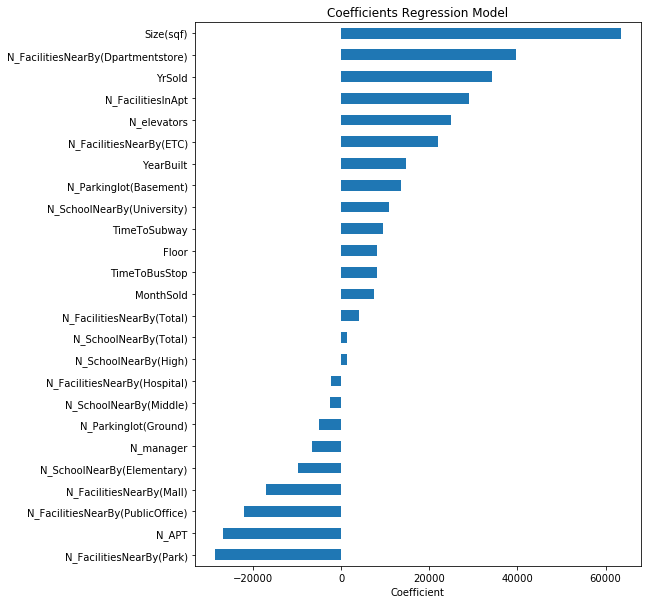

In [ ]:
plt.rcParams['figure.figsize'] = (8, 10)
coef_df.sort_values().plot(kind = "barh")
plt.title("Coefficients Regression Model")
plt.xlabel("Coefficient")

In [ ]:
print ("Root Mean squared error : %.3f" %(np.mean((lr.predict(X_test) - y_test)**2))**0.5)
print('Variance score: %.3f' % lr.score(X_test, y_test))

Root Mean squared error : 39276.833
Variance score: 0.862


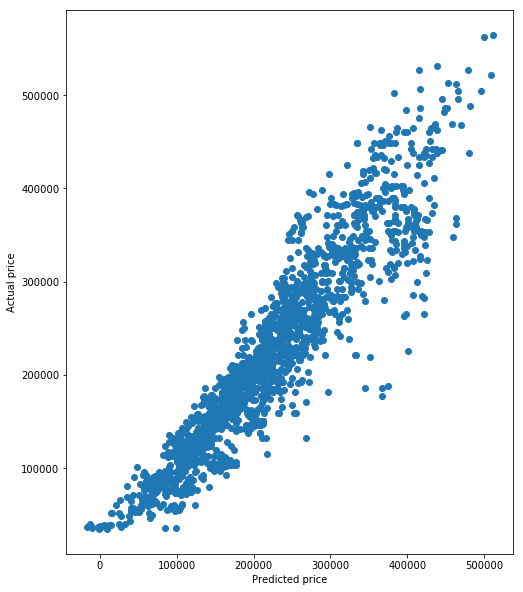

In [ ]:
plt.scatter(lr.predict(X_test), y_test)

plt.xlabel('Predicted price')
plt.ylabel('Actual price')

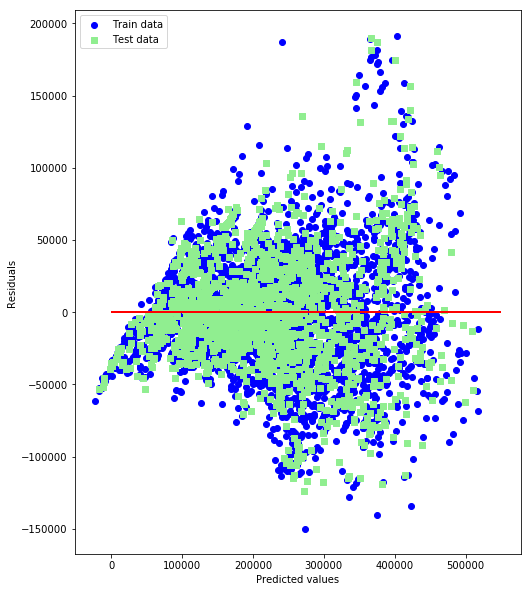

In [ ]:
# residual plot
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

plt.scatter(y_train_pred, y_train_pred - y_train, c='blue', marker='o', label='Train data')
plt.scatter(y_test_pred, y_test_pred - y_test, c='lightgreen', marker='s', label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0 ,xmin=0, xmax=550000, lw=2, color='red')
plt.show()

In [ ]:
print("RMSE train: %.2f" % mean_squared_error(y_train, y_train_pred)**0.5)
print("RMSE test: %.2f"  % mean_squared_error(y_test, y_test_pred)**0.5)

RMSE train: 38869.64
RMSE test: 39276.83


too many outliers in data

# Dealing outliers

count      5891.000000
mean     221218.112545
std      106384.186446
min       32743.000000
25%      144247.000000
50%      207964.000000
75%      291150.000000
max      585840.000000
Name: SalePrice, dtype: float64

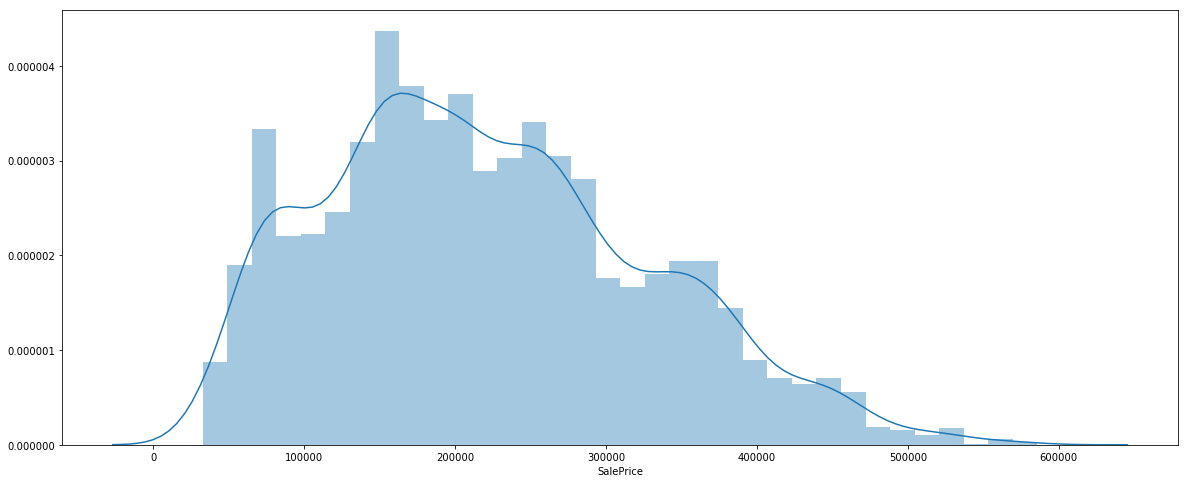

In [ ]:
plt.figure(figsize=(20,8))
sns.distplot(df['SalePrice'])
df['SalePrice'].describe()

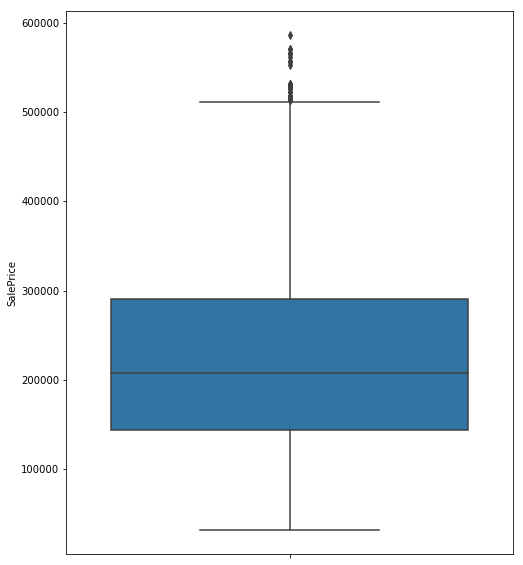

In [ ]:
sns.boxplot(y=df['SalePrice'])

boxplot tells me price over about $510000 are outliers.

Let's subtract those outliers.

In [ ]:
df.sort_values(by='SalePrice').loc[df['SalePrice']>510000]

SalePrice  YearBuilt  YrSold  MonthSold  Size(sqf)  Floor  \
5886     511504       2007    2017          8       1643     19   
4826     513274       2007    2016          2       1643     32   
4262     513274       2007    2015          5       1643     40   
5727     515044       2014    2017          7       1085     20   
5560     515929       2007    2017          5       1643     33   
4537     517699       2007    2015         12       1928     12   
5653     517699       2007    2017          6       1928      5   
4536     517699       2007    2015         12       1643     15   
5177     522123       2007    2016         10       1928     24   
5809     522123       2007    2017          7       1928      5   
5121     526548       2007    2016          9       1519     25   
5802     526548       2007    2017          7       1643     42   
4421     526548       2007    2015          8       1928     23   
5284     526548       2007    2016         12       1643     36   
544      527433       2007    2009          2       1928     28   
505      527433       2007    2008         12       1928     30   
727      527433       2007    2009          6       1928     21   
4390     528318       2007    2015          7       1928      2   
4419     529203       2007    2015          8       1928      2   
5789     529203       2007    2017          7       1928     12   
5021     529203       2007    2016          7       1643     41   
5557     529203       2007    2017          5       1928     31   
5019     530973       2007    2016          7       1519     28   
4411     530973       2007    2015          8       1643     35   
4388     530973       2007    2015          7       1519     20   
4422     553097       2007    2015          8       1928     21   
469      556637       2007    2008         10       1928     31   
5881     557522       2007    2017          8       1928     20   
4494     561946       2007    2015         10       1928     26   
5313     564601       2007    2017          1       1928     33   
4389     566371       2007    2015          7       1928     16   
5558     566371       2007    2017          5       1643     37   
5882     570796       2007    2017          8       1928     24   
4327     570796       2007    2015          6       1928     31   
5561     585840       2007    2017          5       1928     31   

      N_Parkinglot(Ground)  N_Parkinglot(Basement)  TimeToBusStop  \
5886                   0.0                  1270.0              2   
4826                   0.0                  1270.0              2   
4262                   0.0                  1270.0              2   
5727                  90.0                  1174.0              2   
5560                   0.0                  1270.0              2   
4537                   0.0                  1270.0              2   
5653                   0.0                  1270.0              2   
4536                   0.0                  1270.0              2   
5177                   0.0                  1270.0              2   
5809                   0.0                  1270.0              2   
5121                   0.0                  1270.0              2   
5802                   0.0                  1270.0              2   
4421                   0.0                  1270.0              2   
5284                   0.0                  1270.0              2   
544                    0.0                  1270.0              2   
505                    0.0                  1270.0              2   
727                    0.0                  1270.0              2   
4390                   0.0                  1270.0              2   
4419                   0.0                  1270.0              2   
5789                   0.0                  1270.0              2   
5021                   0.0                  1270.0              2   
5557                   0.0                  1270.0              2   
5019  

Let's refit model, after removing 35 outliers from data frame.

In [ ]:
adj_df = df.drop(df.loc[df['SalePrice']>510000].index, axis=0)

In [ ]:
X = adj_df.iloc[:, 1:].values
y= adj_df.iloc[:, 0].values

stdsc = preprocessing.StandardScaler()
X_std = stdsc.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.3, random_state=0)

# refit linear model
slr = linear_model.LinearRegression()
slr.fit(X_train, y_train)

coef = slr.coef_
slr.coef_
adj_coef_df = pd.Series(coef, index=adj_df.columns[1:])

In [ ]:
print ("Root Mean squared error : %.2f" %(np.mean((slr.predict(X_test) - y_test)**2))**0.5)
print('Variance score: %.2f' % slr.score(X_test, y_test))

Root Mean squared error : 38922.84
Variance score: 0.86


slightly better result

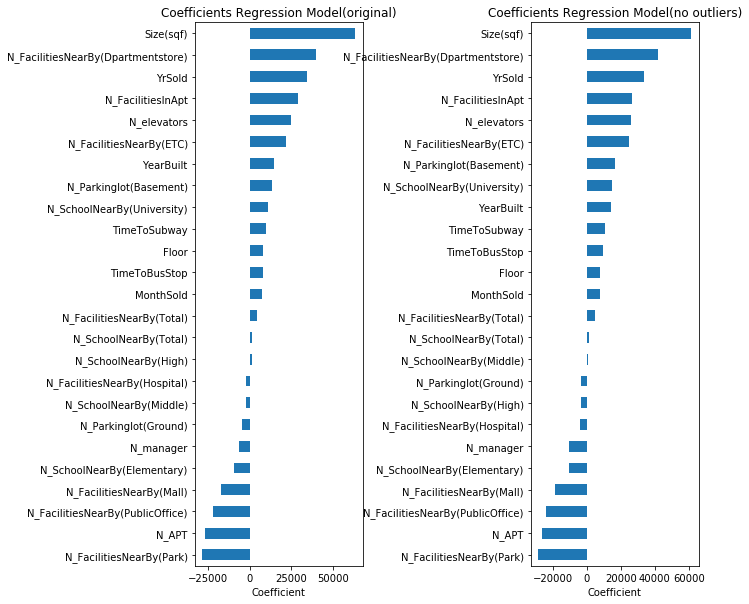

In [ ]:
# compare
fig, ax = plt.subplots(nrows=1, ncols=2)

plt.subplot(1, 2, 1)
plt.rcParams['figure.figsize'] = (8, 10)
coef_df.sort_values().plot(kind = "barh")
plt.title("Coefficients Regression Model(original)")
plt.xlabel("Coefficient")


plt.subplot(1, 2, 2)
plt.rcParams['figure.figsize'] = (8, 10)
adj_coef_df.sort_values().plot(kind = "barh")
plt.title("Coefficients Regression Model(no outliers)")
plt.xlabel("Coefficient")

plt.subplots_adjust(wspace=1, right=1)

delete some features have low coefficient. 

In [ ]:
adj_df.drop(['N_FacilitiesNearBy(Total)', 'N_SchoolNearBy(High)', 
             'N_SchoolNearBy(Middle)', 'N_SchoolNearBy(Total)', 'N_Parkinglot(Ground)'], axis=1, inplace=True)

weired thing is number of elevators and number of parking(basement) have high coefficient.

It doesn't make sense that people would so much care of number of elevators in apartment or number of parking space when they considering buy apartment. 

Let's find out

In [ ]:
df.columns

Index(['SalePrice', 'YearBuilt', 'YrSold', 'MonthSold', 'Size(sqf)', 'Floor',
       'N_Parkinglot(Ground)', 'N_Parkinglot(Basement)', 'TimeToBusStop',
       'TimeToSubway', 'N_APT', 'N_manager', 'N_elevators',
       'N_FacilitiesNearBy(PublicOffice)', 'N_FacilitiesNearBy(Hospital)',
       'N_FacilitiesNearBy(Dpartmentstore)', 'N_FacilitiesNearBy(Mall)',
       'N_FacilitiesNearBy(ETC)', 'N_FacilitiesNearBy(Park)',
       'N_SchoolNearBy(Elementary)', 'N_SchoolNearBy(Middle)',
       'N_SchoolNearBy(High)', 'N_SchoolNearBy(University)',
       'N_FacilitiesInApt', 'N_FacilitiesNearBy(Total)',
       'N_SchoolNearBy(Total)'],
      dtype='object')

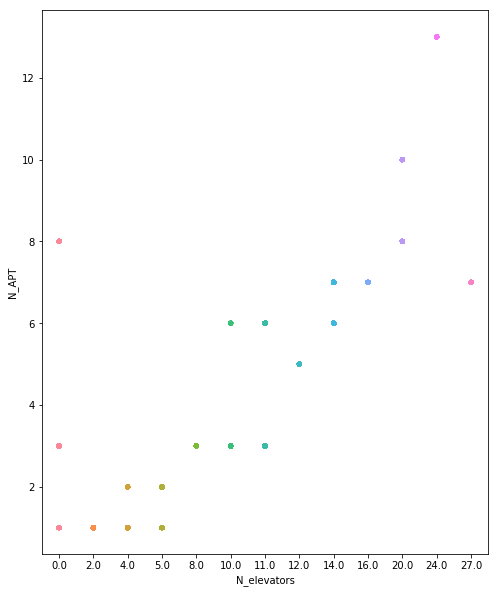

In [ ]:
sns.stripplot(x='N_elevators', y='N_APT', data=adj_df)

I see linear pattern between number of apartments and number of elevators.

It is obvious that the more people stay in apartments, the more elevators are needed.

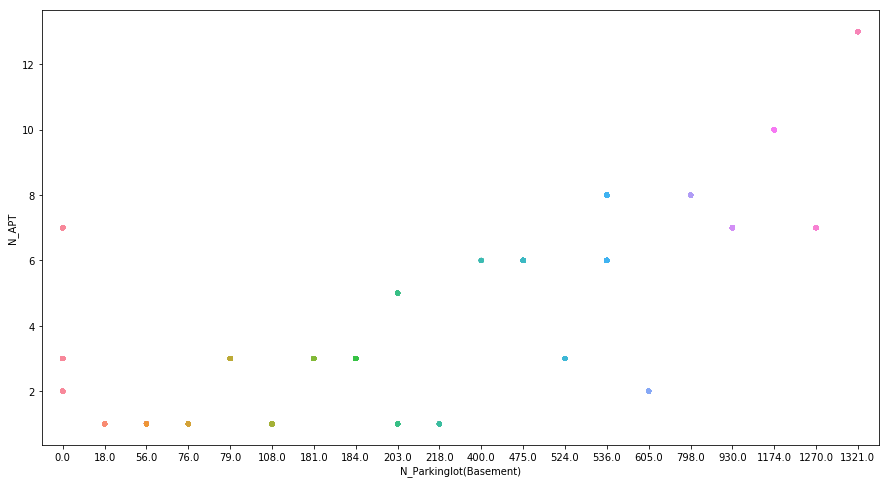

In [ ]:
fig, ax = plt.subplots(figsize=(15,8))
sns.stripplot(x='N_Parkinglot(Basement)', y='N_APT', data=adj_df)

number parking spaces and number of apartments seem to have linear relation except some outlier points.

In [ ]:
# delete more features
adj_df.drop(['N_elevators', 'N_Parkinglot(Basement)', 'MonthSold'], axis=1, inplace=True)

fit again

In [ ]:
X = adj_df.iloc[:, 1:].values
y= adj_df.iloc[:, 0].values

stdsc = preprocessing.StandardScaler()
X_std = stdsc.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.3, random_state=0)

# fit linear model
slr = linear_model.LinearRegression()
slr.fit(X_train, y_train)

coef = slr.coef_
slr.coef_
adj_coef_df = pd.Series(coef, index=adj_df.columns[1:])

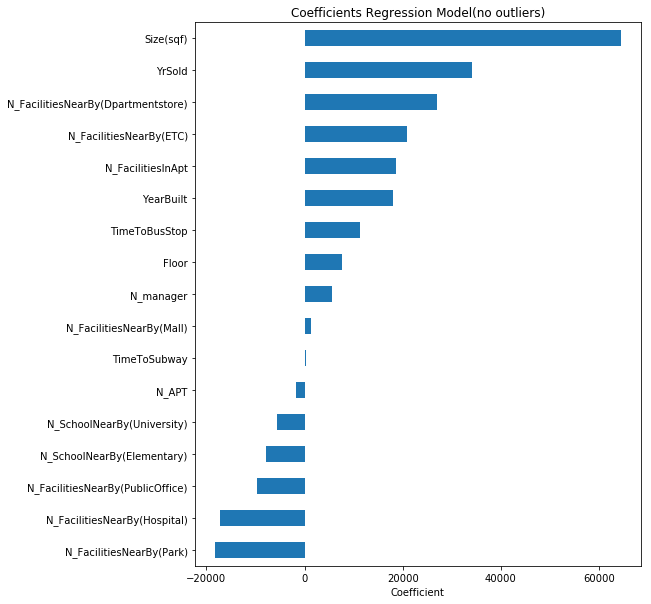

In [ ]:
plt.rcParams['figure.figsize'] = (8, 10)
adj_coef_df.sort_values().plot(kind = "barh")
plt.title("Coefficients Regression Model(no outliers)")
plt.xlabel("Coefficient")

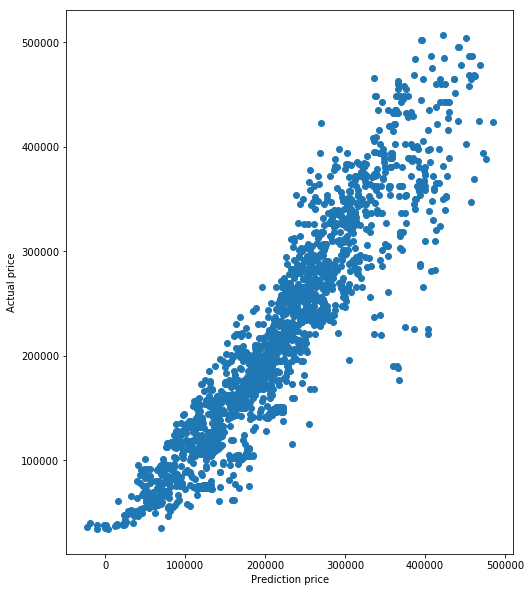

In [ ]:
plt.scatter(slr.predict(X_test), y_test)

plt.xlabel('Prediction price')
plt.ylabel('Actual price')

In [ ]:
print ("Root Mean squared error : %.3f" %(np.mean((slr.predict(X_test) - y_test)**2))**0.5)
print('Variance score: %.3f' % slr.score(X_test, y_test))

Root Mean squared error : 40863.309
Variance score: 0.847


worse result. 

this means model can not predict well with fewer features.

# Optimization

### RMSE (about 40000) and residual plot showing us that model can not predict well.

### For better result, OPTIMIZE it!

## Gradient descent

I'll use GradientBoostingRegressor from sklearn

In [ ]:
# Author: Peter Prettenhofer <peter.prettenhofer@gmail.com>
#
# License: BSD 3 clause
from sklearn import ensemble


# #############################################################################
# Load data

X = adj_df.iloc[:, 1:].values
y= adj_df.iloc[:, 0].values

stdsc = preprocessing.StandardScaler()
X_std = stdsc.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.3, random_state=0)


# #############################################################################
# Fit regression model
params = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'ls'}
clf = ensemble.GradientBoostingRegressor(**params)

clf.fit(X_train, y_train)
rmse = mean_squared_error(y_test, clf.predict(X_test))**0.5
print("RMSE: %.3f" % rmse)


RMSE: 19119.888


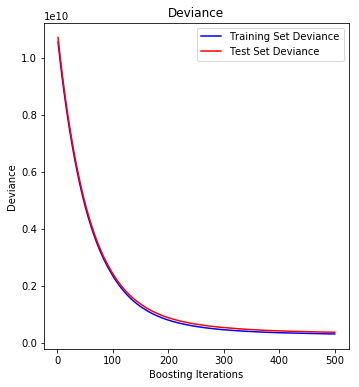

In [ ]:
# #############################################################################
# Plot training deviance

# compute test set deviance
test_score = np.zeros((params['n_estimators'],), dtype=np.float64)

for i, y_pred in enumerate(clf.staged_predict(X_test)):
    test_score[i] = clf.loss_(y_test, y_pred)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, clf.train_score_, 'b-',
         label='Training Set Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, test_score, 'r-',
         label='Test Set Deviance')
plt.legend(loc='upper right')
plt.xlabel('Boosting Iterations')
plt.ylabel('Deviance')


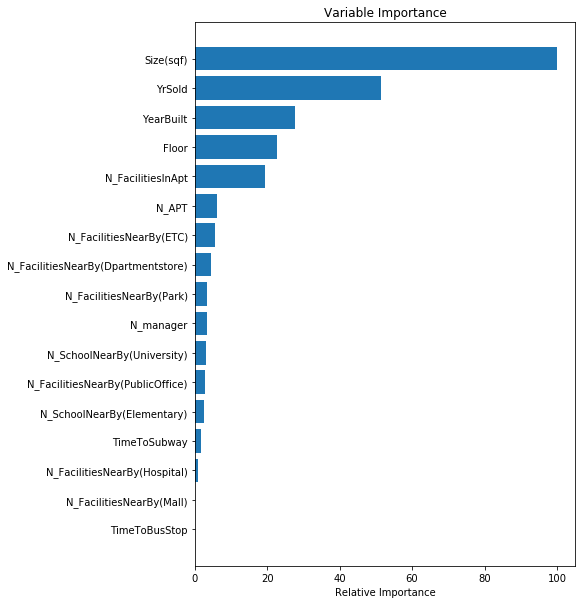

In [ ]:
# #############################################################################
# Plot feature importance
feature_importance = clf.feature_importances_

# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())

sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplots(figsize=(15, 10))
plt.subplot(1, 2, 2)

# exclude target variable in data frame
adj_df.drop('SalePrice', axis=1, inplace=True)

plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, adj_df.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

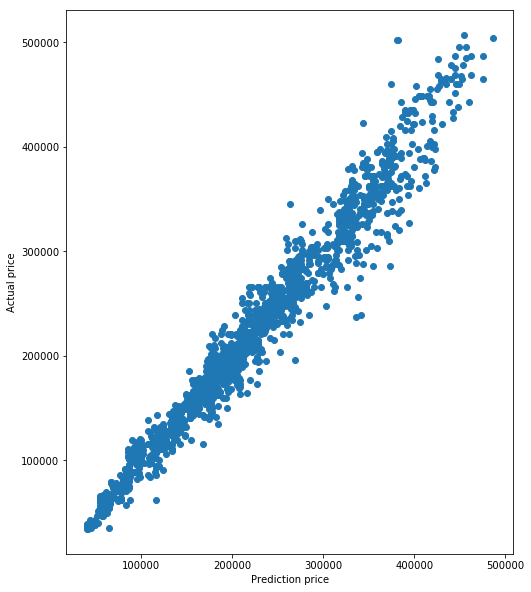

In [ ]:
plt.scatter(clf.predict(X_test), y_test)

plt.xlabel('Prediction price')
plt.ylabel('Actual price')

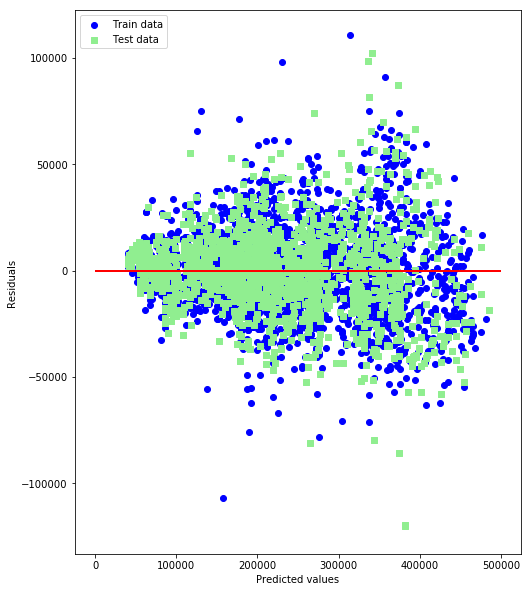

In [ ]:
# residual plot
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

plt.scatter(y_train_pred, y_train_pred - y_train, c='blue', marker='o', label='Train data')
plt.scatter(y_test_pred, y_test_pred - y_test, c='lightgreen', marker='s', label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0 ,xmin=0, xmax=500000, lw=2, color='red')
plt.show()

# rank of features affect on apartment price
1. size(sqf)
2. YrSold
3. YearBuilt
4. Floor
5. Number of Facilities in Apartments